# Implementation of Image Compression with Partitioned IFS

Only implemented with black and white images for simplicity

In [2]:
# preamble to set up directory
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [3]:
# import classes
from AffineTransformation import AffineTransformation
from Block import Block
from PIFS import PIFS, Window

In [2]:
#create domain blocks 
#each domain block has 1 ifs
#apply each of the ifss to its domain block

#assume have square domain blocks -> need two points to represent them
#have starting points in each domain block (say corner or smth)
#at each iteration, calculate next point from previous 
#(2d arrays, x[0][0] initial point in 0th domain block, x[0][1] next point in 0th domain block)

#use IFS defined before

In [3]:
# #Sierpinski triangle

# #sierpinski transforms for given points
# def sierpinski_fns(a, b, c):
#     w1 = af.AffineTransformation(1/2, 0, 0, 1/2, a[0]/2, a[1]/2)
#     w2 = af.AffineTransformation(1/2, 0, 0, 1/2, b[0]/2, b[1]/2)
#     w3 = af.AffineTransformation(1/2, 0, 0, 1/2, c[0]/2, c[1]/2)
    
#     return [w1, w2, w3]

# #initialisation
# probs = [1/3, 1/3, 1/3]
# width = 3
# height = 1.5
# bot_left1 = (-1.5, 1.5)
# d1 = db.DomainBlock(bot_left1, width, height)

# fns1 = sierpinski_fns((0, 3), (-1.5, 1.5), (1.5, 1.5))
# ifs1 = ifs.IFS("ifs1", fns1, probs, bot_left1)

# bot_left2 = (-3, 0)
# d2 = db.DomainBlock(bot_left2, width, height)

# fns2 = sierpinski_fns((-1.5, 1.5), (-3, 0), (0, 0))
# ifs2 = ifs.IFS("ifs2", fns2, probs, bot_left2)


# bot_left3 = (0, 0)
# d3 = db.DomainBlock(bot_left3, width, height)

# fns3 = sierpinski_fns((1.5, 1.5), (0, 0), (3, 0))
# ifs3 = ifs.IFS("ifs3", fns3, probs, bot_left3)

# #creation of pifs
# domain_blocks = [d1, d2, d3]
# ifs_list = [ifs1, ifs2, ifs3]

# pifs_triangle = PIFS.PIFS("Sierpinski Triangle", domain_blocks, ifs_list)

# #showing attractor
# n = 1000000
# pifs_triangle.show_image(n)


In [4]:
# pifs_triangle.show_image_with_blocks(n)

In [5]:
# #sierpinski triangle with top triangle flipped (to show domain blocks are independent)
# fns1_alt = sierpinski_fns((0, 1.5), (-1.5, 3), (1.5, 3))
# ifs1_alt = ifs.IFS("ifs1_alt", fns1_alt, probs, (0, 1.5))

# domain_blocks = [d2, d2, d3]
# ifs_list_alt = [ifs1_alt, ifs2, ifs3]

# pifs_alt = PIFS.PIFS("Sierpinski with top triangle flipped", domain_blocks, ifs_list_alt)

# #show attractor
# n = 1000000
# pifs_alt.show_image(n)
# pifs_alt.show_image_with_blocks(n)

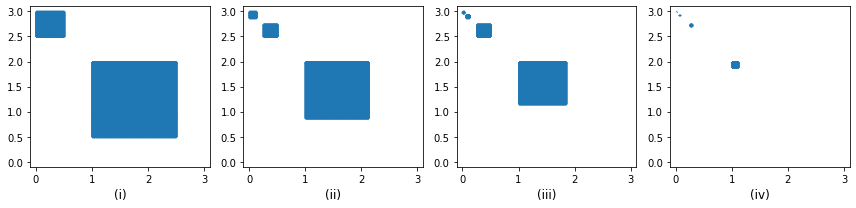

In [4]:
#First example of PIFS
import matplotlib.pyplot as plt

d1 = Block((0,1), 2, 2)
d2 = Block((1,0), 2, 2)

r1 = Block((0,2.5), 0.5, 0.5)
r2 = Block((1,0.5), 1.5, 1.5)

f1 = AffineTransformation(1/4, 0, 0, 1/4, 0, 9/4)
f2 = AffineTransformation(3/4, 0, 0, 3/4, 1/4, 1/2)

pifs = PIFS([d1, d2], [r1, r2], [f1, f2])

window = Window(0, 3, 0, 3, 1000)

plt.figure(figsize=(12,3))
plt.subplot(1, 4, 1).set_xlabel("(i)", fontsize=12)
pifs.show_image(1, window)

plt.subplot(1,4,2).set_xlabel("(ii)", fontsize=12)
pifs.show_image(2, window)

plt.subplot(1,4,3).set_xlabel("(iii)", fontsize=12)
pifs.show_image(3, window)

plt.subplot(1,4,4).set_xlabel("(iv)", fontsize=12)
pifs.show_image(10, window)

plt.tight_layout()

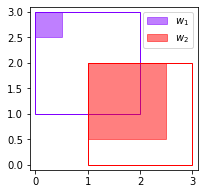

In [5]:
#show domain and range blocks for first PIFS example
pifs.show_blocks(window)

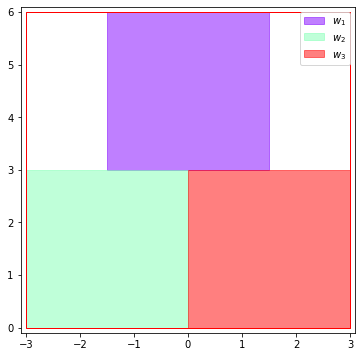

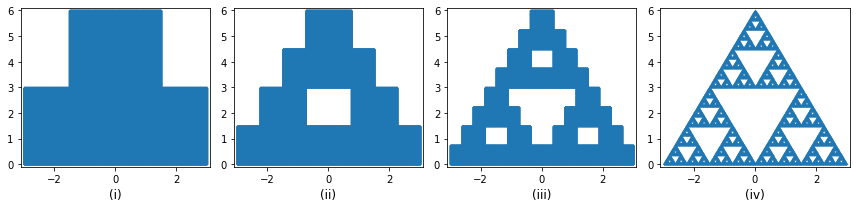

In [6]:
#PIFS for sierpinski triangle
#sierpinski transformations for given points
def sierpinski_fns(a, b, c):
    w1 = AffineTransformation(1/2, 0, 0, 1/2, a[0]/2, a[1]/2)
    w2 = AffineTransformation(1/2, 0, 0, 1/2, b[0]/2, b[1]/2)
    w3 = AffineTransformation(1/2, 0, 0, 1/2, c[0]/2, c[1]/2)
    
    return [w1, w2, w3]

img = Block((-3,0), 6, 6)

width = 3
height = 3
r1 = Block((-1.5, 3), width, height)
r2 = Block((-3, 0), width, height)
r3 = Block((0, 0), width, height)

fns = sierpinski_fns((0, 6), (-3, 0), (3, 0))
sierpinski_pifs = PIFS([img, img, img], [r1, r2, r3], fns)

window = Window(-3, 3, 0, 6, 1000)
sierpinski_pifs.show_blocks(window)

plt.figure(figsize=(12,3))
plt.subplot(1, 4, 1).set_xlabel("(i)", fontsize=12)
sierpinski_pifs.show_image(1, window)

plt.subplot(1,4,2).set_xlabel("(ii)", fontsize=12)
sierpinski_pifs.show_image(2, window)

plt.subplot(1,4,3).set_xlabel("(iii)", fontsize=12)
sierpinski_pifs.show_image(3, window)

plt.subplot(1,4,4).set_xlabel("(iv)", fontsize=12)
sierpinski_pifs.show_image(10, window)

plt.tight_layout()